In [1]:
# main plotting library
import matplotlib.pyplot as plt

# for linear algebra calculations 
import numpy as np
from itertools import product

# for 3d plots
from mpl_toolkits.mplot3d import Axes3D, art3d

# for rendering points on 3d plots
from matplotlib.patches import Circle

# for interactive visuals
from ipywidgets import interact, IntSlider, fixed

# for animations
from matplotlib.animation import FuncAnimation

# for comparisons
from math import inf #this is Infinity in JS

In [43]:
## NOTE: When switching between these modes, sometimes this cell will have to be run multiple times. 

# For interactive plots, uncomment this line, and comment out the second line
# %matplotlib inline

# For animations, uncomment this line, and comment out the first line
%matplotlib notebook

# Linear Regression

2, 4, 6, 8...

1, 4, 7, 10...

5, 15, 25, 35...

What do these patterns have in common? They can all be represented by a **linear equation**: $y=mx+b$. Any such pattern is called a **linear** pattern. 

Many observed patterns in nature are linear.   Given data from such a linear phenomenon, can we determine the linear equation underlying the data? This is the objective of linear regression.

### Linearity

In this section we have two goals:
1. To gain familiarity with plotting in matplotlib and numpy
2. To understand linear equations 
    - what are they?
    - In what sense are they "linear"?
    - How can they be implemented in code?

#### Exploring Plotting

matplotlib is a python library for creating python visualizations. It's full documentation can be found here: [matplotlib docs](https://matplotlib.org/contents.html). In this notebook we are using the pyplot API, imported as "plt" in all code blocks.

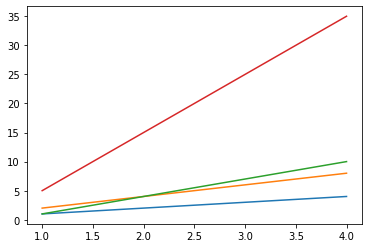

In [7]:
# plot takes two parameters: the x-axis values and the corresponding y-axis values
plt.plot([1, 2, 3, 4], [1, 2, 3, 4])
plt.plot([1, 2, 3, 4], [2, 4, 6, 8])
plt.plot([1, 2, 3, 4], [1, 4, 7, 10])
plt.plot([1, 2, 3, 4], [5, 15, 25, 35])

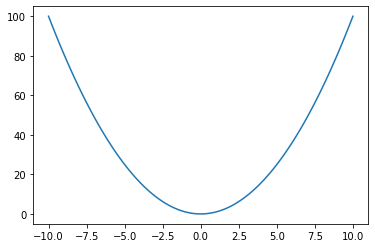

In [8]:
# linspace is a numpy function that creates a number of evenly spaced values in a given range
    # params: start, stop, number_of_values
x = np.linspace(-10, 10, 100)
y = x ** 2
plt.plot(x, y)

In [198]:
# automate the creation of points for easy graphing later on
# the 'linalg' parameter is specifically for graphing lines using linear algebraic input

def graph(func, start=-10, stop=10, smoothness=20, linalg=False):
    x = np.linspace(start, stop, smoothness)
    if linalg:
        x_prime = np.reshape(x, (smoothness, 1))
        ones = np.ones((smoothness, 1))
        x_prime = np.append(x_prime, ones, axis=1)
        y = func(x_prime)
    else:
        y = func(x)
    plt.plot(x, y)
    # adds x and y axes
    plt.plot(np.linspace(-10, 10, 30), 30*[0], "k-", linestyle = ":")
    plt.plot(30*[0], np.linspace(-10, 10, 30), "k-", linestyle = ":")
    plt.ylim((-10, 10))
    plt.xlim((-10, 10))

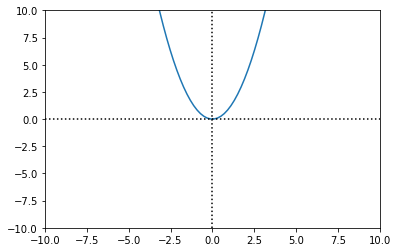

In [10]:
# automate the creation of points for easy graphing later on
# the 'linalg' parameter is specifically for graphing lines using linear algebraic input
# This one is for building graphs with a passed in axes object

def graph_ax(func, axes, start=-10, stop=10, smoothness=20, linalg=False):
    x = np.linspace(start, stop, smoothness)
    if linalg:
        x_prime = np.reshape(x, (smoothness, 1))
        ones = np.ones((smoothness, 1))
        x_prime = np.append(x_prime, ones, axis=1)
        y = func(x_prime)
    else:
        y = func(x)
    axes.plot(x, y)
    axes.plot(np.linspace(-10, 10, 30), 30*[0], "k-", linestyle = ":")
    axes.plot(30*[0], np.linspace(-10, 10, 30), "k-", linestyle = ":")
    plt.ylim((-10, 10))
    plt.xlim((-10, 10))
    
def make_axes(figsize=None):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    return [fig, ax]


_, ax = make_axes()

graph_ax(lambda x: x**2, ax, smoothness=100)

PYTHON NOTE: the `lambda` operator is python's way of constructing anonymous functions, necessary for applications requiring closure and for constructing higher-order functions. The syntax is similar to Javascript's arrow notation.

JS: `const twoSum = (param1, param2) => param1 + param2;`

Python: `two_sum = lambda param1, param2: param1 + param2`

_lambda_ is the english spelling of the greek letter $\lambda$. It was chosen as a nod to the _$\lambda$-calculus_ of early computer scientist, Alonzo Church. This mathematical language was one of the first models of computation, and provided the foundation for all functional programming, including closure and higher-order functions.

In [11]:
# lambda in action
two_sum = lambda param1, param2: param1 + param2  # anonymous function returning the sum of two input parameters
two_sum(2, 2)

4

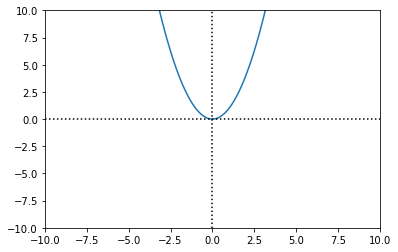

In [12]:
graph(lambda x: x**2, smoothness=1000)

#### Exploring Linear equations

We said that a linear equation has the form of $y = mx + b$ for some fixed numbers $m$ and $b$. 

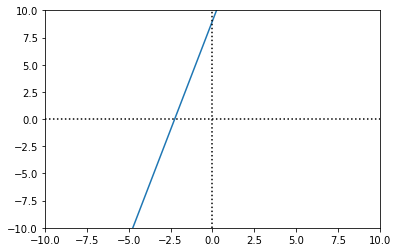

In [13]:
# This higher order function takes the two parameters "slope" and "Y_intercept",
# and returns a linear function.
def line_maker(slope, y_intercept):
    line = lambda x: slope*x + y_intercept # (x) => (slope * x + y_intercept)
    return line

chosen_line = line_maker(4, 9)

def some_line(x): return 3*x + 6

_, ax = make_axes()
graph_ax(chosen_line, ax)

In [14]:
graph_line = lambda slope, y_intercept: graph_ax(line_maker(slope, y_intercept), make_axes()[1])

In [15]:
interact(graph_line, slope=1.0, y_intercept=2)

interactive(children=(FloatSlider(value=1.0, description='slope', max=3.0, min=-1.0), IntSlider(value=2, descr…

<function __main__.<lambda>(slope, y_intercept)>

### Linearity, Extended

In this section, we'll recreate the "line_maker", but we'll use linear algebra (via numpy) so that it can be easily and efficiently extended to higher dimensions

In [16]:
# this function really does nothing, it's just to mirror the previous section
def matrix_multiply(X, beta): return X.dot(beta) 

In [17]:
mat1 = np.array([[1, 2],[3, 4], [5, 6]])
mat2 = np.array([[1, 2, 3], [4, 5, 6]])

In [18]:
mat1

array([[1, 2],
       [3, 4],
       [5, 6]])

In [19]:
mat2

array([[1, 2, 3],
       [4, 5, 6]])

In [20]:
matrix_multiply(mat1, mat2)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

In [21]:
beta = np.array([[1], [-5]])

def line_maker_algebraic(params): return lambda X: matrix_multiply(X, params)

def graph_line_again(params): graph(lambda X: matrix_multiply(X, params), linalg=True)
def graph_line_again(params): graph(line_maker_algebraic(params), linalg=True)

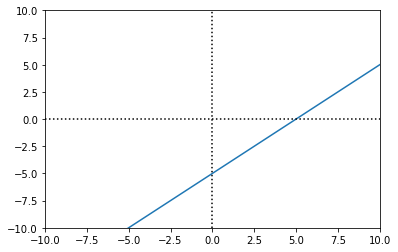

In [22]:
graph_line_again(beta)

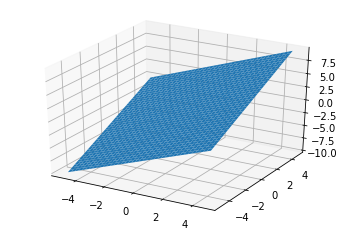

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X + Y
ax.plot_surface(X, Y, Z)

In [24]:
# graphing utilities for 3d plots. Adding standard grapher, and grapher to highlight a single point

def graph3d(func, axes):
    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)
    Z = func(X, Y)
    axes.plot_surface(X, Y, Z)
    axes.set_xlim((-5, 5))
    axes.set_ylim((-5, 5))
    axes.set_zlim((-20, 20))

def make_3d_axes():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    return [fig, ax]

def planeMaker(a, b, c):
    return lambda x, y: a*x + b*y + c

In [25]:
def planeGrapher(a, b, c): 
    graph3d(planeMaker(a, b, c), make_3d_axes()[1])
    

interact(planeGrapher, a=3, b=3, c=3)

interactive(children=(IntSlider(value=3, description='a', max=9, min=-3), IntSlider(value=3, description='b', …

<function __main__.planeGrapher(a, b, c)>

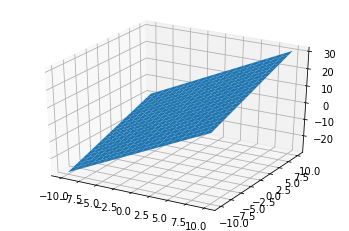

In [26]:
beta_big = np.array([[2], [1], [1]])
plane = line_maker_algebraic(beta_big)

_, ax = make_3d_axes()
xs = np.linspace(-10, 10, 20)
ys = np.linspace(-10, 10, 20)

X, Y = np.meshgrid(xs, ys)
ones = np.ones((1, 400))
coordinates = np.append(X.flatten().reshape(1,400), Y.flatten().reshape(1,400), axis=0)
coordinates = np.append(coordinates, ones, axis=0)
Z = plane(coordinates.transpose()).reshape(20, 20)

ax.plot_surface(X, Y, Z)

In [27]:
def lin_alg_plane_grapher(a, b, c):
    beta = np.array([[a], [b], [c]])
    plane = line_maker_algebraic(beta)

    _, axes = make_3d_axes()
    axes.set_xlim((-5, 5))
    axes.set_ylim((-5, 5))
    axes.set_zlim((-20, 20))
    
    xs = np.linspace(-5, 5, 20)
    ys = np.linspace(-5, 5, 20)

    X, Y = np.meshgrid(xs, ys)
    ones = np.ones((1, 400))
    coordinates = np.append(X.flatten().reshape(1,400), Y.flatten().reshape(1,400), axis=0)
    coordinates = np.append(coordinates, ones, axis=0)
    Z = plane(coordinates.transpose()).reshape(20, 20)
    
    axes.plot_surface(X, Y, Z)
    
interact(lin_alg_plane_grapher, a=3, b=3, c=3)

interactive(children=(IntSlider(value=3, description='a', max=9, min=-3), IntSlider(value=3, description='b', …

<function __main__.lin_alg_plane_grapher(a, b, c)>

In [28]:
def planeAndPointGrapher(a, b, c, cx, cy, cz):
    _, ax = make_3d_axes()
    graph3d(planeMaker(a, b, c), ax)
    p = Circle((cx, cy), 0.4, ec='r', fc='red')
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=cz, zdir="z")
    
interact(planeAndPointGrapher,  a=3, b=3, c=3, cx=3, cy=3, cz=3)

interactive(children=(IntSlider(value=3, description='a', max=9, min=-3), IntSlider(value=3, description='b', …

<function __main__.planeAndPointGrapher(a, b, c, cx, cy, cz)>

## Regression 

In this section, we're going to tackle our main problem – given some data that looks like it might be linear, how can we find the best line for the data?

First, we make sure we understand the problem in detail, and in so doing, come up with a potential method for solving the problem. Then, we look at potential implementations of these solutions

### Understanding the problem -- in quantitative detail
In any problem for which a solution is not obvious, it's good to try and play around with some simple examples. In this section we will build up a basic interactive function that will make clear the problem at hand, and give us some insight into how to implement a solution. To do that, we have to go through several steps:
    1. Generate a random linear data set
    2. Measure how good a chosen line predicts the data set
    3. Generate our interactive environment

In [29]:
# The np.random module has a number of useful functions for generating random data
# np.random.uniform samples points uniformly from a range.
# (start_range, stop_range, number_of_samples) => Numpy Array

np.random.uniform(-1, 1, 10)

array([ 0.3186927 , -0.33709329,  0.7046855 ,  0.6660758 ,  0.8018579 ,
       -0.17416958,  0.03692554, -0.5345707 ,  0.48868822, -0.14526803])

In [30]:
# np.random generates pseudo-random numbers from a "seed". By fixing the seed, we can fix the randomness.
np.random.seed(10)

np.random.uniform(-1, 1, 10)

array([ 0.54264129, -0.9584961 ,  0.26729647,  0.49760777, -0.00298598,
       -0.55040671, -0.60387427,  0.52106142, -0.66177833, -0.82332037])

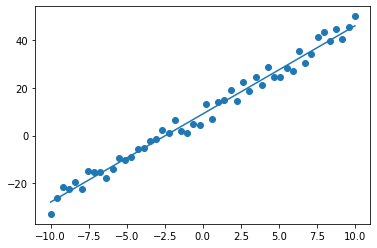

In [31]:
# This function will generates a dataset by adding noise to an underlying linear function.
# Trying to deduce the slope and y_intercept from noisy data is the purpose of linear regression

def generate_random_linear_data(slope, y_intercept, n=100, noise_range=1):
    noise = np.random.uniform(-noise_range, noise_range, n)
    X = np.linspace(-10, 10, n)
    Y = slope * X + y_intercept
    noisy_Y = Y + noise
    return [X, noisy_Y]

# plots the line generating the data with the data on the same chart
_, ax = make_axes()
random_slope, random_intercept = [np.random.uniform(-10, 10, 1)[0], np.random.uniform(-10, 10, 1)[0]]
X, Y = generate_random_linear_data(random_slope, random_intercept, 50, 5)
ax.scatter(X, Y)
ax.plot(X, line_maker(random_slope, random_intercept)(X))

In [64]:
# This function determines how "good" a line is by measuring 
# how wrong the line's prediction is for every data point.
# Uses golf scoring rules -- lower values are better.
def loss(data, line):
    total_loss = 0
    X, Y = data
    predictions = line(X)
    individual_losses = (predictions - Y) ** 2 # squaring makes sure the value is positive
    total_squared_loss = sum(individual_losses)
    root_mean_square_loss = (total_squared_loss ** 0.5) / len(data) 
    return root_mean_square_loss

In [72]:
# Comment this line if you want new random data each time
# np.random.seed(10)

# Generate the random data to be used, trending around a secret slope and y-intercept
SECRET_SLOPE, SECRET_INTERCEPT = np.random.randint(-10, 10), np.random.randint(-10, 10)
SECRET_DATA = generate_random_linear_data(SECRET_SLOPE, SECRET_INTERCEPT, 50, 2)

def graph_data_line_loss(data, slope, y_intercept):
    # create the figure, and set dimensions
    fig, (line_chart, loss_chart) = plt.subplots(1, 2, figsize=(15,5))
    loss_chart.set_xlim(0, 10)
    loss_chart.set_ylim(0, 200)
    line_chart.set_xlim(-15, 15)
    line_chart.set_ylim(min(data[1]), max(data[1]))
    
    # unpack the data, create the line
    X, Y = data
    line = line_maker(slope, y_intercept)
    
    # plot the line, data, and loss
    line_chart.scatter(X, Y, c="orange", marker='.')
    line_chart.plot(X, line(X))
    loss_chart.bar(5, loss(data, line), width=[2], color="orange")
    
interact(
    graph_data_line_loss, 
    data=fixed(SECRET_DATA),
    slope=IntSlider(min=-10, max=10, step=1, value=0), 
    y_intercept=IntSlider(min=-10, max=10, step=1, value=0)
)

interactive(children=(IntSlider(value=0, description='slope', max=10, min=-10), IntSlider(value=0, description…

<function __main__.graph_data_line_loss(data, slope, y_intercept)>

In [73]:
print(SECRET_SLOPE, SECRET_INTERCEPT)

8 2


<IPython.core.display.Javascript object>


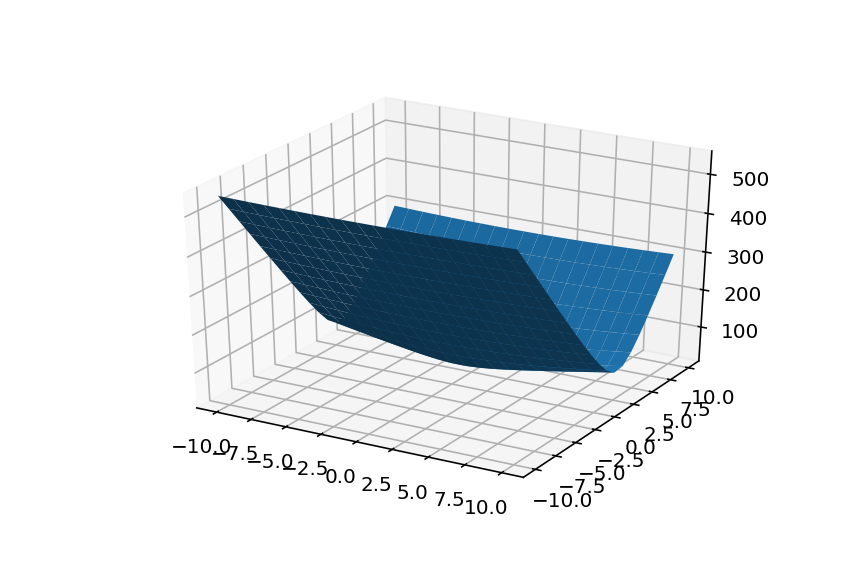

In [65]:
def loss_maker(data):
    X, Y = data
    def loss_function(slope, y_intercept):
        predictions = slope * X + y_intercept
        individual_losses = (predictions - Y) ** 2
        total_losses = sum(individual_losses)
        return total_losses ** (0.5)
    return loss_function

loss_function = loss_maker(generate_random_linear_data(-2, 5, 50, 2))
_, ax = make_3d_axes()


def get_loss_surface_sets(data, smoothness=20):
    slopes = np.linspace(-10, 10, smoothness)
    intercepts = np.linspace(-10, 10, smoothness)
    pairs = product(slopes, intercepts)
    loss_function = loss_maker(data)
    Z = np.array([loss_function(slope, y_int) for slope, y_int in pairs]).reshape(smoothness, smoothness)
    X, Y = np.meshgrid(slopes, intercepts)
    return [X, Y, Z]

X, Y, Z = get_loss_surface_sets(generate_random_linear_data(3, -1, 50, 2), smoothness=20)
ax.plot_surface(X, Y, Z)

In [52]:
# Comment out this line if you want new random data each time
# np.random.seed(10)

# Generate the random data to be used, trending around a secret slope and y-intercept
SECRET_SLOPE, SECRET_INTERCEPT = np.random.randint(-10, 10), np.random.randint(-10, 10)
SECRET_DATA = generate_random_linear_data(SECRET_SLOPE, SECRET_INTERCEPT, 50, 2)

def graph_data_line_surface_loss(data, slope, y_intercept):
    # create the figure, add subplots
    fig = plt.figure(figsize=(15,3))
    line_chart = fig.add_subplot(131)
    loss_chart = fig.add_subplot(132)
    loss_surface = fig.add_subplot(133, projection='3d')
    
    # set dimensions
    loss_chart.set_xlim(0, 10)
    loss_chart.set_ylim(0, 200)
    line_chart.set_xlim(-15, 15)
    line_chart.set_ylim(min(data[1]), max(data[1]))
    
    # unpack the data, create the line, loss function, surface
    X, Y = data
    line = line_maker(slope, y_intercept)
    loss_function = loss_maker(data)
    loss_X, loss_Y, loss_Z = get_loss_surface_sets(data)
    
    # plot the line, data, loss bar, and loss surface
    line_chart.scatter(X, Y, c="orange", marker='.')
    line_chart.plot(X, line(X))
    loss_chart.bar(5, loss_function(slope, y_intercept), width=[2], color="orange")
    loss_surface.plot_surface(loss_X, loss_Y, loss_Z)
    
    # plot the circle marker on the surface
    cx, cy, cz = [y_intercept, slope, loss_function(slope, y_intercept)]
    p = Circle((cx, cy), 0.4, ec='orange', fc='orange')
    loss_surface.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=cz, zdir="z")
    
interact(
    graph_data_line_surface_loss, 
    data=fixed(SECRET_DATA),
    slope=IntSlider(min=-10, max=10, step=1, value=0), 
    y_intercept=IntSlider(min=-10, max=10, step=1, value=0)
)

interactive(children=(IntSlider(value=0, description='slope', max=10, min=-10), IntSlider(value=0, description…

<function __main__.graph_data_line_surface_loss(data, slope, y_intercept)>

In [37]:
print(SECRET_SLOPE, SECRET_INTERCEPT)

0 6


<IPython.core.display.Javascript object>


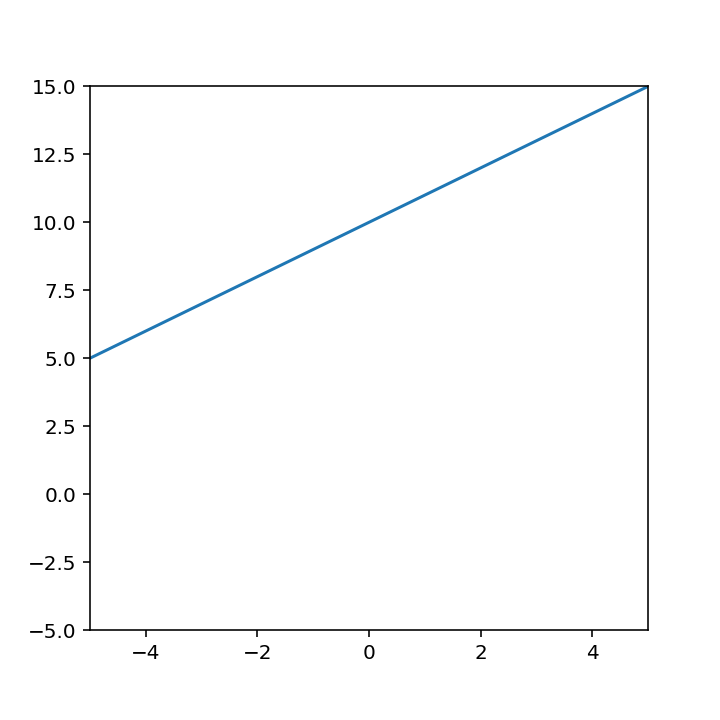

In [320]:
# PLAYING WITH ANIMATIONS

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
line, = ax.plot([],[])

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 15)

def animate(i):
    linear_func = line_maker(1, i)
    x = np.linspace(-5, 5, 100)
    
    # testing with generic function
    # line.set_data(x, (lambda x: 0.1*i*(x**2))(x))
    
    #testing with passed in linear_func
    line.set_data(x, linear_func(x))
    return line

FuncAnimation(fig, animate, frames=11, interval=400, repeat=False)

In [322]:
# Generating Animation Utility

# given a function that chooses a slope and y_intercept, 
# creates an animation of how that choice evolves over time w.r.t scatter plot, bar loss chart, and loss surface
#   param_chooser: state -> (slope, y_intercept, state), 
#   where state is a user defined structure so that information can persist between function calls
def animateTriPlot(data, paramChooser, initial_state=None, steps=10, delay=400):
    # create the figure, add subplots
    fig = plt.figure(figsize=(15,3))
    
    line_chart = fig.add_subplot(131)
    line_data, = line_chart.plot([], [])
    
    loss_chart = fig.add_subplot(132)
    loss_data, = loss_chart.bar(5, 0, width=[2], color='orange')
    
    # handling re-rendering of 3d plot differently, so no initial plotting required
    loss_surface = fig.add_subplot(133, projection='3d')

    # unpack the data, create the line, loss function, surface
    X, Y = data
    loss_function = loss_maker(data)
    loss_X, loss_Y, loss_Z = get_loss_surface_sets(data)

    # set dimensions
    loss_chart.set_xlim(0, 10)
    loss_chart.set_ylim(0, 400)
    line_chart.set_xlim(-15, 15)
    line_chart.set_ylim(min(data[1]), max(data[1]))
    
    state = {0: initial_state}
    
    def animate(i):
        # use the chooser to find slope and, y_intercept, make the line from that
        slope, y_intercept, next_state = paramChooser(state[i])
        state[i+1] = next_state
        line = line_maker(slope, y_intercept)

        # plot the data, loss bar, and loss surface
        line_chart.scatter(X, Y, c="orange", marker='.')
        line_data.set_data(X, line(X))
        loss_data.set_height(loss_function(slope, y_intercept))
        
        loss_surface.clear()
        loss_surface.plot_surface(loss_X, loss_Y, loss_Z, color="C0")

        # plot the circle marker on the surface
        cx, cy, cz = [y_intercept, slope, loss_function(slope, y_intercept)]
        p = Circle((cx, cy), 0.4, ec='orange', fc='orange')
        loss_surface.add_patch(p)
        art3d.pathpatch_2d_to_3d(p, z=cz, zdir="z")

    return FuncAnimation(fig, animate, frames=steps, interval=delay, blit=False, repeat=False)

In [323]:
# state params: loss_function, best_pair, best_value, last_step, current_step

def randomChooser(state={}):
    loss_function, best_pair, best_value, last_step, current_step = state.values() # destructuring dictionary
    
    random_slope, random_intercept = np.random.randint(-10, 10), np.random.randint(-10, 10)
    if (current_step == last_step):
        best_slope, best_intercept = best_pair
        return (best_slope, best_intercept, None)

    new_state = state.copy() # for functional purity
    if best_value > loss_function(random_slope, random_intercept):
        new_state['best_value'] = loss_function(random_slope, random_intercept)
        new_state['best_pair'] = (random_slope, random_intercept)
    new_state['current_step'] = current_step + 1
    return (random_slope, random_intercept, new_state)

In [324]:
def analyticChooser(state={}):
    pass

<IPython.core.display.Javascript object>


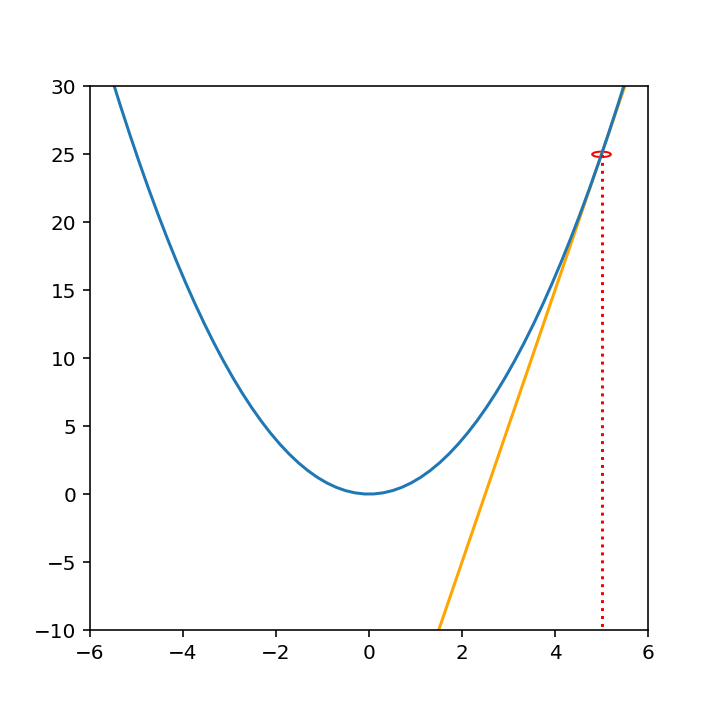

In [325]:
# Demonstrating the intuition behind derivatives – necessary for gradient descent

# CLAIM: The slope of the tangent line at a given x value is 2*x. 
# If so, this function will generate a line tangent to the parabola at a given point
def tangent_line(touching_x_value):
    slope = 2 * touching_x_value
    y_intercept = touching_x_value ** 2 - (slope * touching_x_value)
    return line_maker(slope, y_intercept)

# prepping the figure and axes for animation
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

line, = ax.plot([], [], c="orange")
parabola, = ax.plot([], [])
dotted, = ax.plot([], [], "k-", c="red", linestyle = ":")

ax.set_ylim(-10, 30)
ax.set_xlim(-6, 6)

# at every step, generates a new tangent line at a new point
# if the CLAIM is true, the line should smoothly traverse along the parabola, touching it the entire time.
def animate(i):
    
    linear_func = tangent_line(i)
    x = np.linspace(-10, 10, 100)
    line.set_data(x, linear_func(x))
    parabola.set_data(x, (lambda x: x**2)(x))
    dotted.set_data(30*[i], np.linspace(-15, i ** 2, 30))
    
    # plots a circle marker for the touching point
    ax.patches = []
    p = Circle((i, i**2), 0.2, ec='red', fc='none')
    ax.add_patch(p)
    return line

FuncAnimation(fig, animate, frames=np.linspace(-5, 5, 400), interval=5, repeat=False)


In [326]:
# GRADIENT DESCENT #
# On a surface in real life, a ball "knows instinctively" how to roll down a hill to the lowest point. 
# Mathematically, what it is doing is moving along the "gradient", which is a derivative in multiple dimensions.
# By calculating the "gradient" manually, we can teach the machine how to roll down the loss surface for a problem,
# and thereby choose a good slope and y_intercept for the problem at hand -- and do so in a way similar to how 
# a person might solve the problem!

def gradientDescentChooser(state={}):
    Xs, Ys = state['data']
    curr_slope, curr_intercept = state['current_pair']
    lr = state['learning_rate']
    new_state = state.copy()
    
    # for animation purposes only – with this you can see the line start at 0, 0
    if state['first_step']:
        new_state['first_step'] = False
        return (0, 0, new_state)
    
    Y_pred = line_maker(curr_slope, curr_intercept)(Xs)
    D_m = -(2/len(Xs)) * sum((Ys - Y_pred) * Xs) # Derivative with respect to the slope
    D_b = -(2/len(Xs)) * sum(Ys - Y_pred) # Derivative with respect to the y_intercept
    new_slope = curr_slope - lr * D_m
    new_intercept = curr_intercept - lr * D_b
    new_state['current_pair'] = (new_slope, new_intercept)
    return (new_slope, new_intercept, new_state)

In [327]:
# run this cell to generate new data for the animations
SECRET_SLOPE, SECRET_INTERCEPT = np.random.randint(-10, 10), np.random.randint(-10, 10)
animation_data = generate_random_linear_data(SECRET_SLOPE, SECRET_INTERCEPT, 50, 2)

<IPython.core.display.Javascript object>


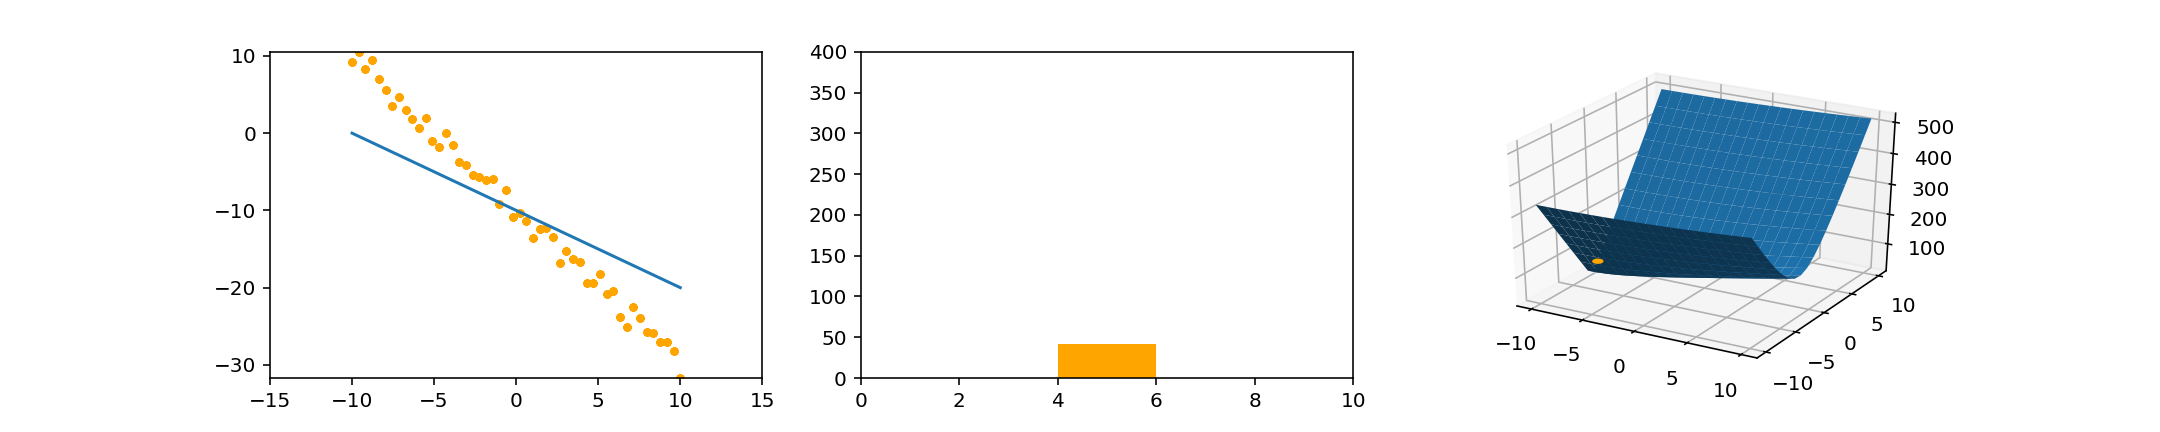

In [328]:
rand_initial_state = {
    'loss_function': loss_maker(animation_data), 
    'best_pair': (None, None), 
    'best_value': inf, 
    'last_step': 9, 
    'current_step': 0,
}

animateTriPlot(animation_data, randomChooser, initial_state=rand_initial_state)

<IPython.core.display.Javascript object>


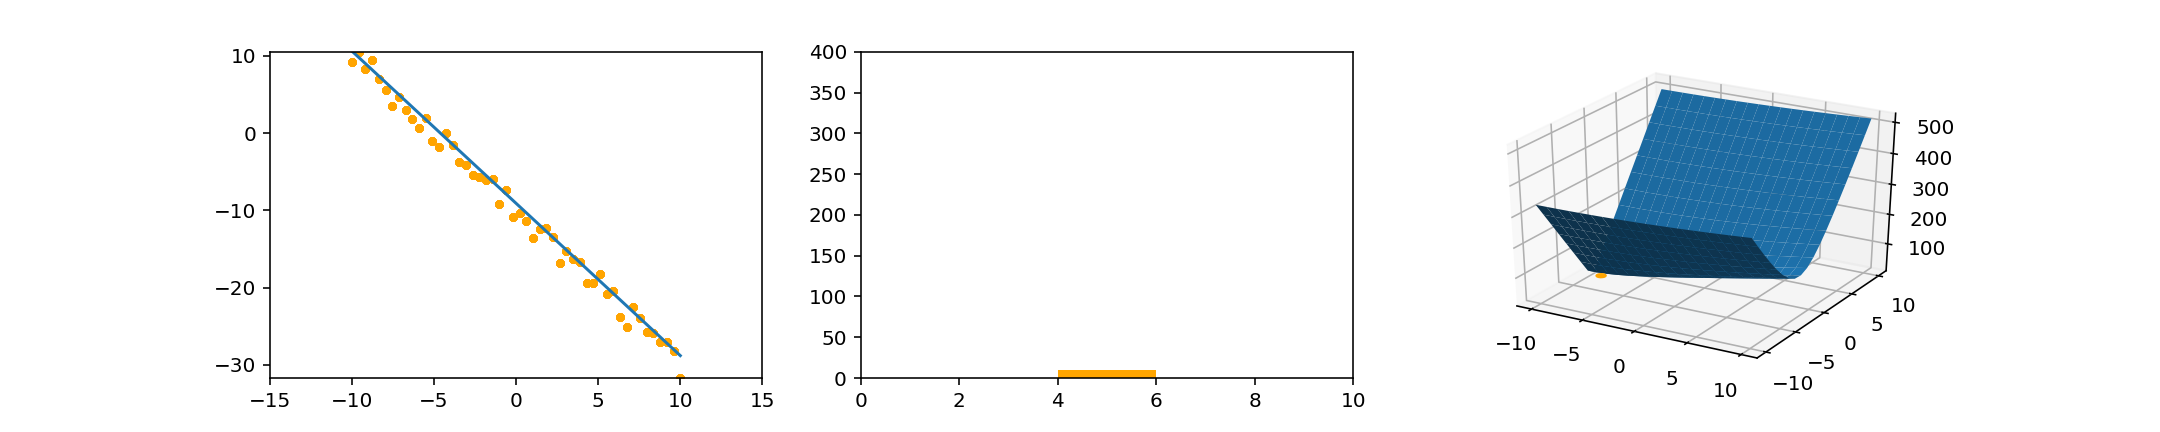

In [330]:
GD_initial_state = {
    'first_step': True,
    'data': animation_data,
    'current_pair': (0, 0),
    'learning_rate': 0.025,
}

animateTriPlot(animation_data, gradientDescentChooser, initial_state=GD_initial_state, steps=50, delay=50)

In [332]:
# seeing the numerical results of gradient descent

GD_initial_state = {
    'first_step': True,
    'data': animation_data,
    'current_pair': (0, 0),
    'learning_rate': 0.02,
}

loss_function = loss_maker(animation_data)

for i in range(10):
    curr_slope, curr_intercept, GD_initial_state = gradientDescentChooser(GD_initial_state)
    print(f"STEP {i}:", curr_slope, curr_intercept, loss_function(curr_slope, curr_intercept))

STEP 0: 0 0 108.10562143980071
STEP 1: -2.734392930799562 -0.3958631823005642 74.70455594008388
STEP 2: -1.67411812089769 -0.7758918373091059 66.08020458914051
STEP 3: -2.085245088002498 -1.1407193461173057 62.53914338734433
STEP 4: -1.9258285089210418 -1.490953754573178 59.92635556967217
STEP 5: -1.9876431008097697 -1.8271787866908151 57.54370518767476
STEP 6: -1.9636741774243445 -2.1499548175237466 55.27736095684815
STEP 7: -1.9729682497574688 -2.459819807123361 53.10631378206209
STEP 8: -1.9693644257915635 -2.7572901971389907 51.02424397652692
STEP 9: -1.9707618269212004 -3.0428617715539956 49.02725491867778


In [184]:
print(SECRET_SLOPE, SECRET_INTERCEPT)

5 4


### TO DO:
    - [] Show Linear Regression calculation (math cheat)
    - [x] Show random guessing calculation (Brute force)
    - [x] Show gradient descent (Hybridization)